# Import Packages

In [1]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.svm import SVC


from scipy import stats

# Exploratory Data Analysis

## Define Features and Target

In [2]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets

In [3]:
pd.concat([X, y], axis=1).head().T

,0,1,2,3,4
Marital Status,1,1,1,1,2
Application mode,17,15,1,17,39
Application order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime/evening attendance,1,1,1,1,0
Previous qualification,1,1,1,1,1
Previous qualification (grade),122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mother's qualification,19,1,37,38,37
Father's qualification,12,3,37,37,38


## Overview of Statistics

In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


## Histograms

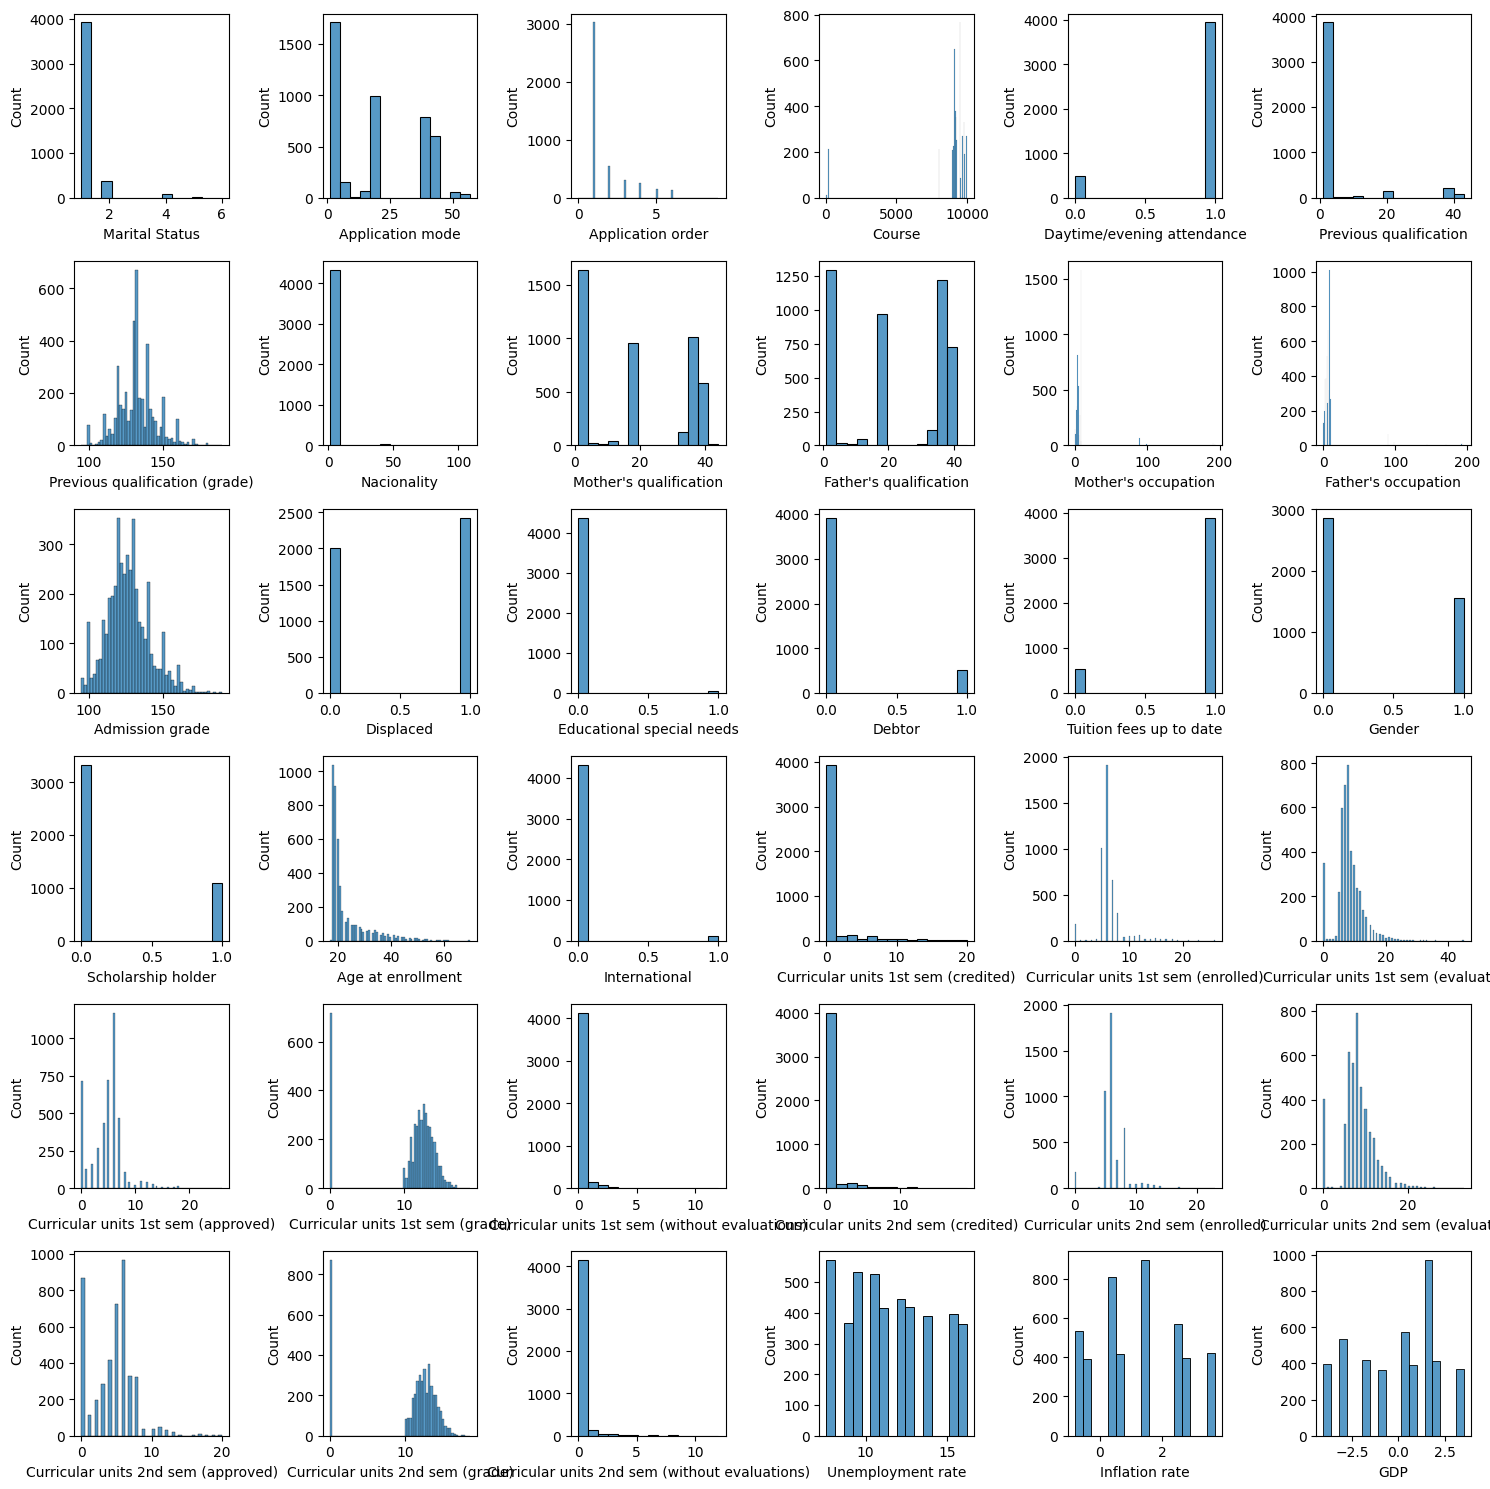

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))

axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i])

plt.tight_layout()

## Boxplots

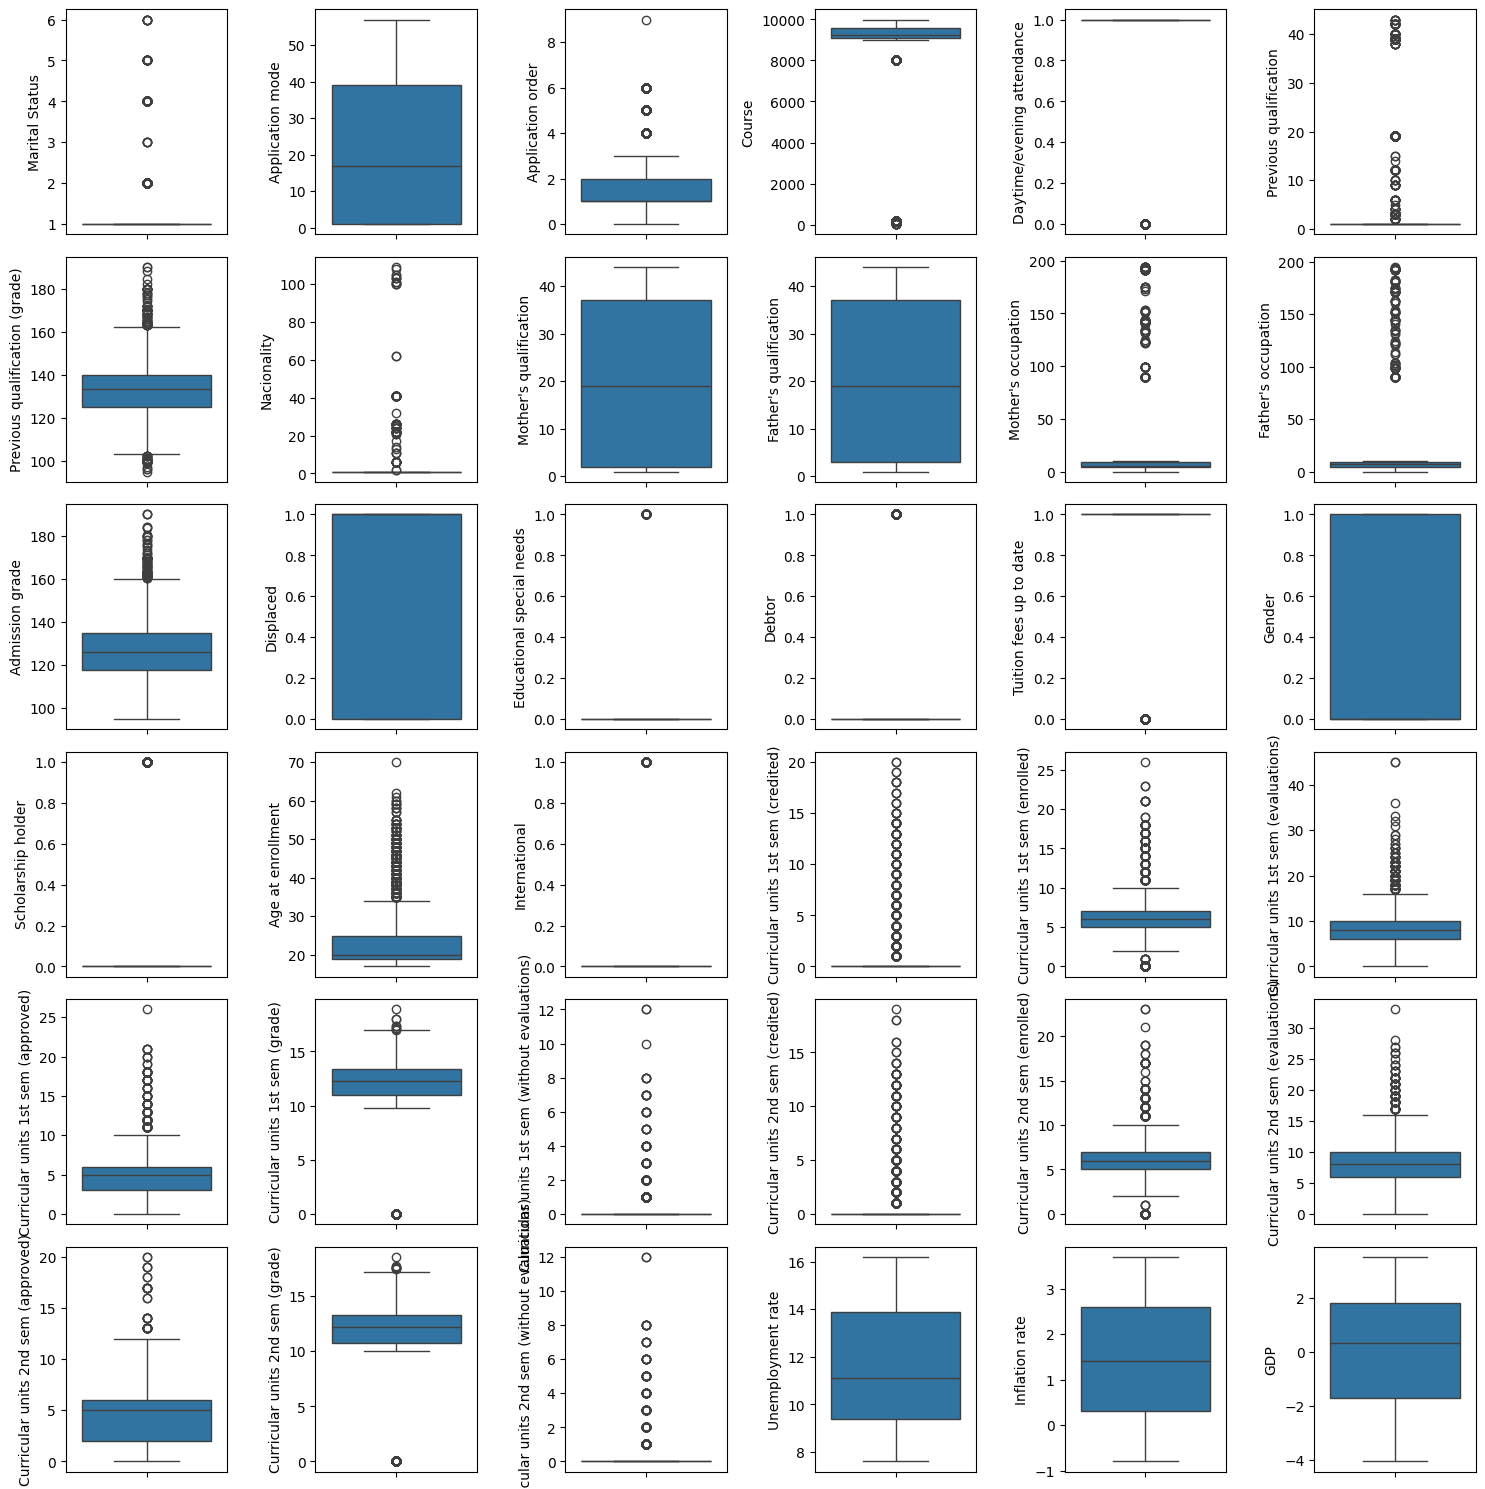

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))

axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.boxplot(X[col], ax=axes[i])

plt.tight_layout()

## Violinplots

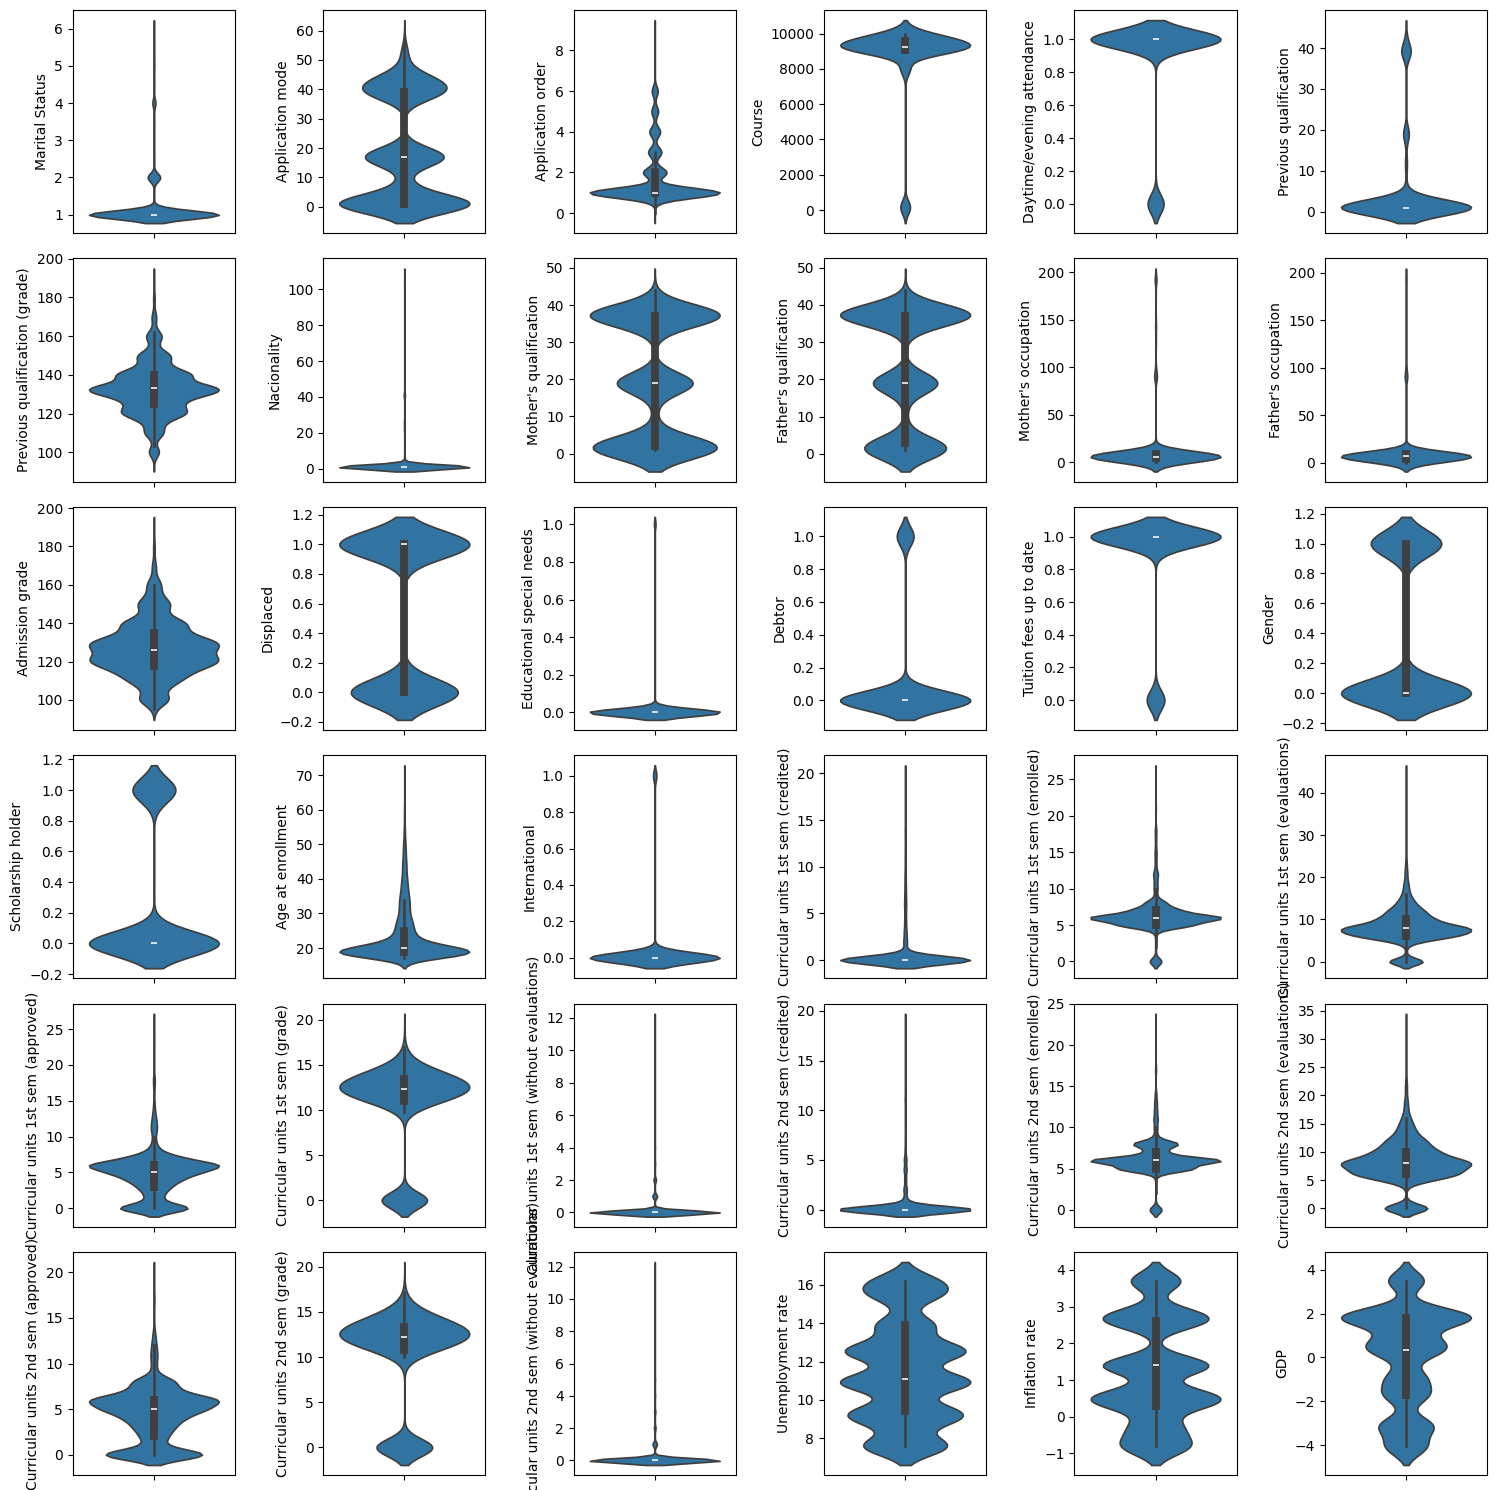

In [7]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))

axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.violinplot(X[col], ax=axes[i])

plt.tight_layout()

# Classification without Dimensionality Reduction

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y.to_numpy().ravel(), # to avoid DataConversionWarning
    test_size=0.3,
    stratify=y,
    random_state=42
)

Upon understanding the data, those that are mapped to categorical data will be preprocessed using One Hot Encoder. Within a given feature, those with very small counts (<0.5% of the total dataset) will be flagged as infrequent. This is to simplify the pipeline and to avoid the instances if a specific category is randomly not part of the training data but fed to the model as a test data.

Standard scaler is applied to the features which can be considered almost normal. Power Transform is applied to those that are heavily skewed to the right and then Quantile Transform is applied to those that are almost uniform.

Features that are binary are left intact.

In [9]:
col_ohe = [
    'Marital Status',
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
]

col_std_scale = [
    'Previous qualification (grade)',
    'Admission grade',
]

col_pt_scale = [
    'Application order',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
]

col_qt_scale = [
    'Unemployment rate',
    'Inflation rate',
    'GDP',
]

## SVC

In [10]:
columntransfomer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=.005), col_ohe),
        ('std', StandardScaler(), col_std_scale),
        ('pt', PowerTransformer(method='yeo-johnson'), col_pt_scale),
        ('qt',QuantileTransformer(output_distribution='uniform'), col_qt_scale)
    ], 
    remainder='passthrough'
).set_output(transform='pandas')


pipeline = Pipeline(
    [
        ('columntransformer', columntransfomer),
        ('model', SVC())
    ]
)

param_distributions = {
    'model__C': stats.loguniform(1, 1000),
    'model__kernel': ['rbf'],
    'model__gamma': stats.loguniform(0.0001, 10)
}


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


random_search_svc = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    verbose=3,
    cv=cv,
    return_train_score=True
)

random_search_svc.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END model__C=402.2965340959116, model__gamma=0.00658973624867807, model__kernel=rbf;, score=(train=0.983, test=0.750) total time=   0.4s
[CV 2/3] END model__C=402.2965340959116, model__gamma=0.00658973624867807, model__kernel=rbf;, score=(train=0.987, test=0.727) total time=   0.4s
[CV 3/3] END model__C=402.2965340959116, model__gamma=0.00658973624867807, model__kernel=rbf;, score=(train=0.985, test=0.730) total time=   0.4s
[CV 1/3] END model__C=5.859390787837202, model__gamma=0.001402547268916642, model__kernel=rbf;, score=(train=0.776, test=0.766) total time=   0.3s
[CV 2/3] END model__C=5.859390787837202, model__gamma=0.001402547268916642, model__kernel=rbf;, score=(train=0.771, test=0.743) total time=   0.3s
[CV 3/3] END model__C=5.859390787837202, model__gamma=0.001402547268916642, model__kernel=rbf;, score=(train=0.780, test=0.765) total time=   0.3s
[CV 1/3] END model__C=37.58581800538164, model__gamma=0.20

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                             min_frequency=0.005,
                                                                                             sparse_output=False),
                                                                               ['Marital '
                                                                                'Status',
                                                                                'Application '
                                                                                'mode',
                                                                                'Course',
                                                                                'Previous '
                                                                                'qualificat...
                                                                                'rate',
                                                                                'Inflation '
                                                                                'rate',
                                                                                'GDP'])])),
                                             ('model', SVC())]),
                   n_iter=100,
                   param_distributions={'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000297864F1490>,
                                        'model__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029786B8C8D0>,
                                        'model__kernel': ['rbf']},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [11]:
print(f'best score: {random_search_svc.best_score_}\n')
print(f'best params: {random_search_svc.best_params_}\n')
print(classification_report(y_test, random_search_svc.best_estimator_.predict(X_test)))

best score: 0.7839147286821705

best params: {'model__C': 244.68635691712393, 'model__gamma': 0.0005418121862998127, 'model__kernel': 'rbf'}

              precision    recall  f1-score   support

     Dropout       0.82      0.74      0.78       427
    Enrolled       0.56      0.44      0.50       238
    Graduate       0.82      0.93      0.87       663

    accuracy                           0.78      1328
   macro avg       0.73      0.70      0.71      1328
weighted avg       0.77      0.78      0.77      1328



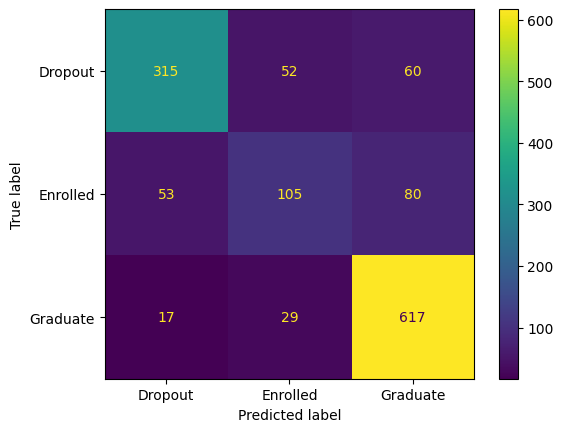

In [12]:
ConfusionMatrixDisplay.from_estimator( random_search_svc.best_estimator_, X_test, y_test)

## Logistic Regression

In [13]:
columntransfomer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=.005), col_ohe),
        ('std', StandardScaler(), col_std_scale),
        ('pt', PowerTransformer(method='yeo-johnson'), col_pt_scale),
        ('qt',QuantileTransformer(output_distribution='uniform'), col_qt_scale)
    ], 
    remainder='passthrough'
).set_output(transform='pandas')


pipeline = Pipeline(
    [
        ('columntransformer', columntransfomer),
        ('model', LogisticRegression(max_iter=10_000))
    ]
)

param_distributions = {
    'model__C': stats.loguniform(.1, 1000),
    'model__fit_intercept': [True, False],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search_log_reg = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    verbose=3,
    cv=cv,
    return_train_score=True
)

random_search_log_reg.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END model__C=8.429559812037613, model__fit_intercept=True;, score=(train=0.812, test=0.784) total time=   0.2s
[CV 2/3] END model__C=8.429559812037613, model__fit_intercept=True;, score=(train=0.816, test=0.768) total time=   0.2s
[CV 3/3] END model__C=8.429559812037613, model__fit_intercept=True;, score=(train=0.807, test=0.773) total time=   0.2s
[CV 1/3] END model__C=21.61652856419476, model__fit_intercept=False;, score=(train=0.811, test=0.783) total time=   0.1s
[CV 2/3] END model__C=21.61652856419476, model__fit_intercept=False;, score=(train=0.815, test=0.768) total time=   0.2s
[CV 3/3] END model__C=21.61652856419476, model__fit_intercept=False;, score=(train=0.807, test=0.772) total time=   0.1s
[CV 1/3] END model__C=2.219400272235782, model__fit_intercept=False;, score=(train=0.809, test=0.781) total time=   0.1s
[CV 2/3] END model__C=2.219400272235782, model__fit_intercept=False;, score=(train=0.814, tes

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                             min_frequency=0.005,
                                                                                             sparse_output=False),
                                                                               ['Marital '
                                                                                'Status',
                                                                                'Application '
                                                                                'mode',
                                                                                'Course',
                                                                                'Previous '
                                                                                'qualificat...
                                                                                'evaluations)']),
                                                                              ('qt',
                                                                               QuantileTransformer(),
                                                                               ['Unemployment '
                                                                                'rate',
                                                                                'Inflation '
                                                                                'rate',
                                                                                'GDP'])])),
                                             ('model',
                                              LogisticRegression(max_iter=10000))]),
                   n_iter=100,
                   param_distributions={'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002978685F1D0>,
                                        'model__fit_intercept': [True, False]},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [14]:
print(f'best score: {random_search_log_reg.best_score_}\n')
print(f'best params: {random_search_log_reg.best_params_}\n')
print(classification_report(y_test, random_search_log_reg.best_estimator_.predict(X_test)))

best score: 0.7800387596899224

best params: {'model__C': 0.6637084207579068, 'model__fit_intercept': True}

              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.79       427
    Enrolled       0.58      0.42      0.49       238
    Graduate       0.81      0.93      0.87       663

    accuracy                           0.78      1328
   macro avg       0.74      0.70      0.71      1328
weighted avg       0.77      0.78      0.77      1328



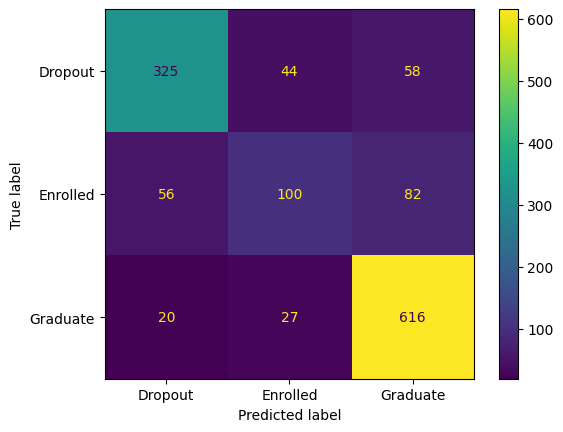

In [15]:
ConfusionMatrixDisplay.from_estimator(random_search_log_reg.best_estimator_, X_test, y_test)

# Dimension Reduction and Classification (PCA + SVC)

## Investigation of PCA

In [16]:
continuous_transformer = ColumnTransformer(
    [
        ('std',StandardScaler(), col_std_scale),
        ('pt',PowerTransformer(method='yeo-johnson'), col_pt_scale),
        ('qt',QuantileTransformer(output_distribution='uniform'), col_qt_scale),
    ]
).set_output(transform='pandas')

continuous_data = continuous_transformer.fit_transform(X_train)
continuous_data

,std__Previous qualification (grade),std__Admission grade,pt__Application order,pt__Age at enrollment,pt__Curricular units 1st sem (credited),pt__Curricular units 1st sem (enrolled),pt__Curricular units 1st sem (evaluations),pt__Curricular units 1st sem (approved),pt__Curricular units 1st sem (grade),pt__Curricular units 1st sem (without evaluations),pt__Curricular units 2nd sem (credited),pt__Curricular units 2nd sem (enrolled),pt__Curricular units 2nd sem (evaluations),pt__Curricular units 2nd sem (approved),pt__Curricular units 2nd sem (grade),pt__Curricular units 2nd sem (without evaluations),qt__Unemployment rate,qt__Inflation rate,qt__GDP
3742,-1.123830,-0.927934,-0.644815,-0.617834,-0.390086,-0.055829,0.227740,0.186590,0.646556,-0.271125,-0.370090,-0.082881,-0.483247,0.573167,0.803391,-0.258555,0.594094,0.347347,0.773273
3539,0.474852,0.552257,-0.644815,-0.205170,-0.390086,-0.055829,-0.244836,0.487124,0.702718,-0.271125,-0.370090,-0.082881,-0.229929,0.573167,0.313217,3.867597,1.000000,0.253253,0.345846
1117,0.398724,1.202434,-0.644815,-0.205170,-0.390086,0.341439,0.227740,0.487124,0.383994,-0.271125,-0.370090,0.810383,0.020396,0.861556,0.685856,-0.258555,0.783784,0.166667,0.557558
790,0.398724,-0.201672,-0.644815,-0.617834,-0.390086,-0.055829,-0.489952,0.487124,0.535741,-0.271125,-0.370090,-0.082881,-0.483247,0.573167,0.757473,-0.258555,0.496496,0.444444,0.870871
4380,0.550979,0.905013,-0.644815,1.340323,-0.390086,0.727011,1.334252,-0.129783,-0.039827,3.688234,-0.370090,0.810383,1.475550,-0.041528,0.099508,3.867597,0.692693,1.000000,0.257257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,-0.210298,-0.201672,-0.644815,0.125704,2.586374,2.179509,0.902334,2.076485,0.590897,-0.271125,2.718531,2.572326,0.998022,1.928414,0.411762,-0.258555,0.872372,0.862863,0.000000
1997,-0.895447,-0.312341,-0.644815,-1.138238,-0.390086,-0.055829,-0.244836,0.487124,0.434649,-0.271125,-0.370090,-0.082881,-0.483247,0.573167,0.621325,-0.258555,0.783784,0.166667,0.557558
71,1.312256,0.268669,-0.644815,0.793276,-0.390086,0.341439,-0.005878,0.774732,0.156162,-0.271125,-0.370090,0.810383,0.020396,1.140029,0.734614,-0.258555,0.783784,0.166667,0.557558
967,0.025698,-0.478344,-0.644815,1.872766,-0.390086,-0.055829,0.227740,-1.708271,-2.060703,-0.271125,-0.370090,-0.082881,-0.483247,-1.578902,-1.880883,-0.258555,0.783784,0.166667,0.557558


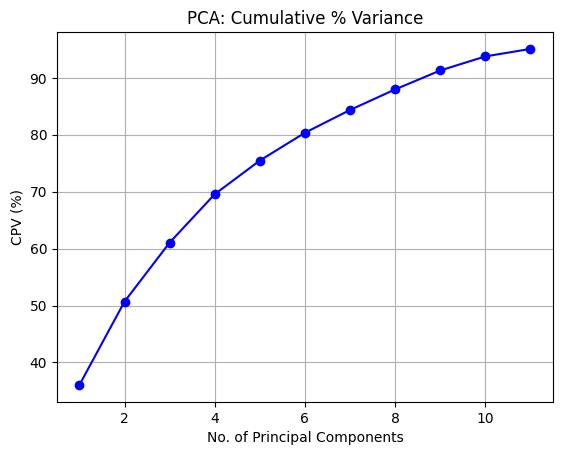

Reduced number of columns for non-category data from 19 to 11 while maintaining at least 95% information.


In [17]:
pca = PCA(n_components=0.95).set_output(transform='pandas')
test_data_pca = pca.fit_transform(continuous_data)
evr = pca.explained_variance_ratio_
evr_cum_sum = np.cumsum(evr) * 100

plt.plot(np.arange(evr_cum_sum.size)+1, evr_cum_sum, 'bo-')
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Principal Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()

n_orig_data_col = len(col_std_scale + col_pt_scale + col_qt_scale)
n_reduced_data_col = pca.n_components_

print(
    f'Reduced number of columns for non-category data from {n_orig_data_col}',
    f'to {n_reduced_data_col} while maintaining at least {pca.n_components:.0%} information.'
)

## Integrating PCA to SVC Pipeline

In [18]:
# std + pt + qt
continuous_transformer = ColumnTransformer(
    [
        ('std', StandardScaler(), col_std_scale),
        ('pt', PowerTransformer(method='yeo-johnson'), col_pt_scale),
        ('qt', QuantileTransformer(output_distribution='uniform'), col_qt_scale),
    ]
).set_output(transform='pandas')


# continuous_transformer -> pca
continuous_data_pipeline = Pipeline(
    [
        ('continuous_transformer', continuous_transformer),
        ('pca', PCA(n_components=0.95))
    ]
)


# continuous_transformer_pca + ohe
preprocessor = ColumnTransformer(
    [
        ('continuous_transformer_pca', continuous_data_pipeline, col_std_scale + col_pt_scale + col_qt_scale),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=.005), col_ohe)
    ],
    remainder='passthrough'
)


# preprocessor -> model
# (((std + pt + qt) -> pca) + ohe) -> model
pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', SVC())
    ]
)


param_distributions = {
    'model__C': stats.loguniform(1, 1000),
    'model__kernel': ['rbf'],
    'model__gamma': stats.loguniform(0.0001, 10)
}


cv = StratifiedKFold(
    n_splits=3, 
    shuffle=True, 
    random_state=42
)


random_search_pca_svc = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    verbose=3,
    cv=cv,
    return_train_score=True
)


random_search_pca_svc.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END model__C=7.242710792720153, model__gamma=0.0001173356983827827, model__kernel=rbf;, score=(train=0.687, test=0.704) total time=   0.4s
[CV 2/3] END model__C=7.242710792720153, model__gamma=0.0001173356983827827, model__kernel=rbf;, score=(train=0.700, test=0.673) total time=   0.3s
[CV 3/3] END model__C=7.242710792720153, model__gamma=0.0001173356983827827, model__kernel=rbf;, score=(train=0.689, test=0.700) total time=   0.3s
[CV 1/3] END model__C=12.425565693391366, model__gamma=0.06486386171738379, model__kernel=rbf;, score=(train=0.995, test=0.743) total time=   0.4s
[CV 2/3] END model__C=12.425565693391366, model__gamma=0.06486386171738379, model__kernel=rbf;, score=(train=0.998, test=0.734) total time=   0.5s
[CV 3/3] END model__C=12.425565693391366, model__gamma=0.06486386171738379, model__kernel=rbf;, score=(train=0.998, test=0.727) total time=   0.4s
[CV 1/3] END model__C=1.8406109919314155, model__gam

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('continuous_transformer_pca',
                                                                               Pipeline(steps=[('continuous_transformer',
                                                                                                ColumnTransformer(transformers=[('std',
                                                                                                                                 StandardScaler(),
                                                                                                                                 ['Previous '
                                                                                                                                  'qualification '
                                                                                                                                  '(grade)',
                                                                                                                                  'Admissio...
                                                                                'occupation',
                                                                                "Father's "
                                                                                'occupation'])])),
                                             ('model', SVC())]),
                   n_iter=100,
                   param_distributions={'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029786C97B90>,
                                        'model__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000297847FC8D0>,
                                        'model__kernel': ['rbf']},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [19]:
print(f'best score: {random_search_pca_svc.best_score_}\n')
print(f'best params: {random_search_pca_svc.best_params_}\n')
print(classification_report(y_test, random_search_pca_svc.best_estimator_.predict(X_test)))

best score: 0.767764857881137

best params: {'model__C': 195.63332433950853, 'model__gamma': 0.0014222483179030874, 'model__kernel': 'rbf'}

              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       427
    Enrolled       0.54      0.43      0.48       238
    Graduate       0.81      0.92      0.86       663

    accuracy                           0.77      1328
   macro avg       0.72      0.70      0.70      1328
weighted avg       0.76      0.77      0.76      1328



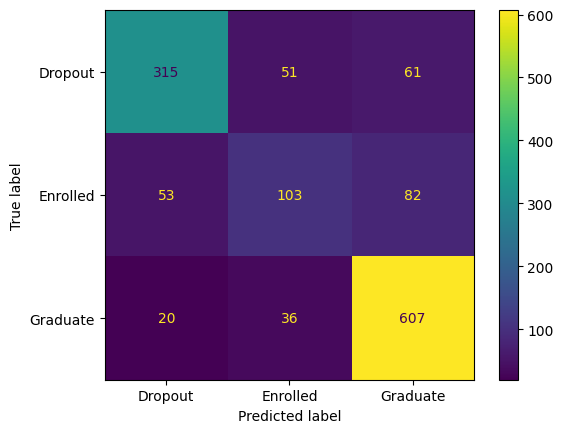

In [20]:
ConfusionMatrixDisplay.from_estimator(random_search_pca_svc.best_estimator_, X_test, y_test)

# Dimension Reduction and Classification (LDA)

## Investigation of LDA

In [21]:
continuous_transformer = ColumnTransformer(
    [
        ('std', StandardScaler(), col_std_scale),
        ('pt', PowerTransformer(method='yeo-johnson'), col_pt_scale),
        ('qt', QuantileTransformer(output_distribution='uniform'), col_qt_scale),
    ]
).set_output(transform='pandas')

continuous_data = continuous_transformer.fit_transform(X_train)
continuous_data

,std__Previous qualification (grade),std__Admission grade,pt__Application order,pt__Age at enrollment,pt__Curricular units 1st sem (credited),pt__Curricular units 1st sem (enrolled),pt__Curricular units 1st sem (evaluations),pt__Curricular units 1st sem (approved),pt__Curricular units 1st sem (grade),pt__Curricular units 1st sem (without evaluations),pt__Curricular units 2nd sem (credited),pt__Curricular units 2nd sem (enrolled),pt__Curricular units 2nd sem (evaluations),pt__Curricular units 2nd sem (approved),pt__Curricular units 2nd sem (grade),pt__Curricular units 2nd sem (without evaluations),qt__Unemployment rate,qt__Inflation rate,qt__GDP
3742,-1.123830,-0.927934,-0.644815,-0.617834,-0.390086,-0.055829,0.227740,0.186590,0.646556,-0.271125,-0.370090,-0.082881,-0.483247,0.573167,0.803391,-0.258555,0.594094,0.347347,0.773273
3539,0.474852,0.552257,-0.644815,-0.205170,-0.390086,-0.055829,-0.244836,0.487124,0.702718,-0.271125,-0.370090,-0.082881,-0.229929,0.573167,0.313217,3.867597,1.000000,0.253253,0.345846
1117,0.398724,1.202434,-0.644815,-0.205170,-0.390086,0.341439,0.227740,0.487124,0.383994,-0.271125,-0.370090,0.810383,0.020396,0.861556,0.685856,-0.258555,0.783784,0.166667,0.557558
790,0.398724,-0.201672,-0.644815,-0.617834,-0.390086,-0.055829,-0.489952,0.487124,0.535741,-0.271125,-0.370090,-0.082881,-0.483247,0.573167,0.757473,-0.258555,0.496496,0.444444,0.870871
4380,0.550979,0.905013,-0.644815,1.340323,-0.390086,0.727011,1.334252,-0.129783,-0.039827,3.688234,-0.370090,0.810383,1.475550,-0.041528,0.099508,3.867597,0.692693,1.000000,0.257257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,-0.210298,-0.201672,-0.644815,0.125704,2.586374,2.179509,0.902334,2.076485,0.590897,-0.271125,2.718531,2.572326,0.998022,1.928414,0.411762,-0.258555,0.872372,0.862863,0.000000
1997,-0.895447,-0.312341,-0.644815,-1.138238,-0.390086,-0.055829,-0.244836,0.487124,0.434649,-0.271125,-0.370090,-0.082881,-0.483247,0.573167,0.621325,-0.258555,0.783784,0.166667,0.557558
71,1.312256,0.268669,-0.644815,0.793276,-0.390086,0.341439,-0.005878,0.774732,0.156162,-0.271125,-0.370090,0.810383,0.020396,1.140029,0.734614,-0.258555,0.783784,0.166667,0.557558
967,0.025698,-0.478344,-0.644815,1.872766,-0.390086,-0.055829,0.227740,-1.708271,-2.060703,-0.271125,-0.370090,-0.082881,-0.483247,-1.578902,-1.880883,-0.258555,0.783784,0.166667,0.557558


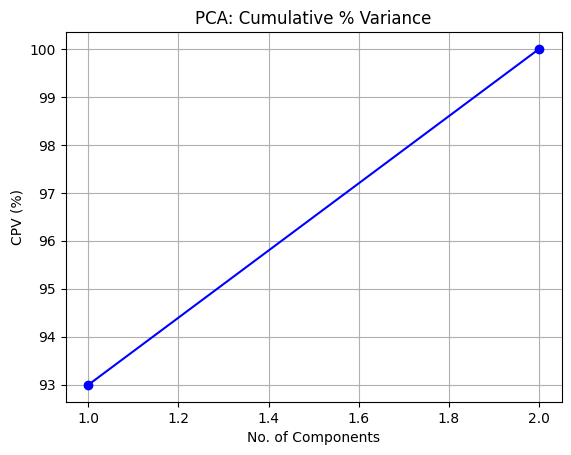

Reduced number of columns for non-category data from 19 to 2.


In [22]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
test_data_lda = lda.fit_transform(continuous_data, y_train)
evr = lda.explained_variance_ratio_
evr_cum_sum = np.cumsum(evr) * 100

plt.plot(np.arange(evr_cum_sum.size)+1, evr_cum_sum, 'bo-')
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()

n_orig_data_col = len(col_std_scale + col_pt_scale + col_qt_scale)
n_reduced_data_col = min(np.unique(y_train).shape[0] - 1, continuous_data.columns.shape[0])

print(
    f'Reduced number of columns for non-category data from {n_orig_data_col}',
    f'to {n_reduced_data_col}.'
)

## Integrating LDA to SVC Pipeline

In [23]:
# std + pt + qt
continuous_transformer = ColumnTransformer(
    [
        ('std', StandardScaler(), col_std_scale),
        ('pt', PowerTransformer(method='yeo-johnson'), col_pt_scale),
        ('qt', QuantileTransformer(output_distribution='uniform'), col_qt_scale),
    ]
).set_output(transform='pandas')


# continuous_transformer -> lda
continuous_data_pipeline = Pipeline(
    [
        ('continuous_transformer', continuous_transformer),
        ('lda', LinearDiscriminantAnalysis())
    ]
)


# continuous_transformer_pca + ohe
preprocessor = ColumnTransformer(
    [
        ('continuous_transformer_lda', continuous_data_pipeline, col_std_scale + col_pt_scale + col_qt_scale),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=.005), col_ohe)
    ],
    remainder='passthrough'
)


# preprocessor -> model
# (((std + pt + qt) -> lda) + ohe) -> model
pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', SVC())
    ]
)


param_distributions = {
    'model__C': stats.loguniform(1, 1000),
    'model__kernel': ['rbf'],
    'model__gamma': stats.loguniform(0.0001, 10)
}


cv = StratifiedKFold(
    n_splits=3, 
    shuffle=True, 
    random_state=42
)


random_search_lda_svc = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    verbose=3,
    cv=cv,
    return_train_score=True
)


random_search_lda_svc.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END model__C=77.9160463484786, model__gamma=0.05266901649105677, model__kernel=rbf;, score=(train=0.997, test=0.723) total time=   0.4s
[CV 2/3] END model__C=77.9160463484786, model__gamma=0.05266901649105677, model__kernel=rbf;, score=(train=0.998, test=0.725) total time=   0.4s
[CV 3/3] END model__C=77.9160463484786, model__gamma=0.05266901649105677, model__kernel=rbf;, score=(train=0.998, test=0.724) total time=   0.4s
[CV 1/3] END model__C=25.681254968416233, model__gamma=0.0010669660930621178, model__kernel=rbf;, score=(train=0.784, test=0.780) total time=   0.3s
[CV 2/3] END model__C=25.681254968416233, model__gamma=0.0010669660930621178, model__kernel=rbf;, score=(train=0.793, test=0.761) total time=   0.2s
[CV 3/3] END model__C=25.681254968416233, model__gamma=0.0010669660930621178, model__kernel=rbf;, score=(train=0.791, test=0.774) total time=   0.3s
[CV 1/3] END model__C=11.579508347549998, model__gamma=

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('continuous_transformer_lda',
                                                                               Pipeline(steps=[('continuous_transformer',
                                                                                                ColumnTransformer(transformers=[('std',
                                                                                                                                 StandardScaler(),
                                                                                                                                 ['Previous '
                                                                                                                                  'qualification '
                                                                                                                                  '(grade)',
                                                                                                                                  'Admissio...
                                                                                'occupation',
                                                                                "Father's "
                                                                                'occupation'])])),
                                             ('model', SVC())]),
                   n_iter=100,
                   param_distributions={'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000297849521D0>,
                                        'model__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000297850F7290>,
                                        'model__kernel': ['rbf']},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [24]:
print(f'best score: {random_search_lda_svc.best_score_}\n')
print(f'best params: {random_search_lda_svc.best_params_}\n')
print(classification_report(y_test, random_search_lda_svc.best_estimator_.predict(X_test)))


best score: 0.7793927648578812

best params: {'model__C': 3.3345924224471535, 'model__gamma': 0.018586006226653157, 'model__kernel': 'rbf'}

              precision    recall  f1-score   support

     Dropout       0.85      0.75      0.80       427
    Enrolled       0.56      0.39      0.46       238
    Graduate       0.79      0.94      0.86       663

    accuracy                           0.78      1328
   macro avg       0.74      0.69      0.71      1328
weighted avg       0.77      0.78      0.77      1328



In [25]:
pd.DataFrame(classification_report(y_test, random_search_lda_svc.best_estimator_.predict(X_test), output_dict=True))

,Dropout,Enrolled,Graduate,accuracy,macro avg,weighted avg
precision,0.848806,0.563636,0.792621,0.78012,0.735021,0.769649
recall,0.749415,0.390756,0.939668,0.78012,0.693280,0.780120
f1-score,0.796020,0.461538,0.859903,0.78012,0.705821,0.767969
support,427.000000,238.000000,663.000000,0.78012,1328.000000,1328.000000


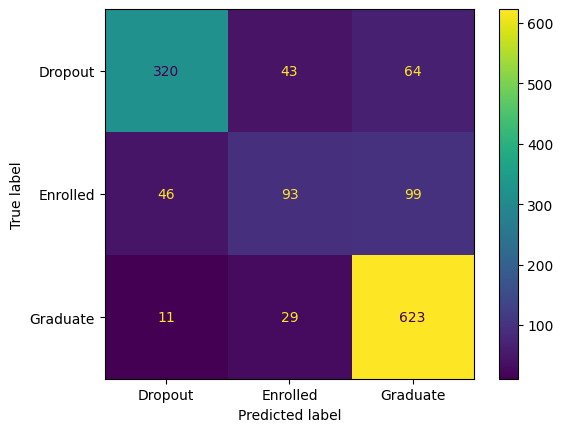

In [26]:
ConfusionMatrixDisplay.from_estimator(random_search_lda_svc.best_estimator_, X_test, y_test)

# Summary

In [27]:
def highlight_max(data, hl_index=False, color='green'):
    if hl_index:
        is_max = data.groupby(level=1).transform('max') == data
    else:
        is_max = data.max() == data
    return [f'background-color: {color}' if v else '' for v in is_max]

In [28]:
names = [
    'SVC',
    'PCA + SVC',
    'LDA + SVC'
]

grid_results = [
    random_search_svc,
    random_search_pca_svc,
    random_search_lda_svc
]

dfs = []

for name, result in zip(names, grid_results):
    df = (
            pd.DataFrame(
                classification_report(
                    y_test,
                    result.best_estimator_.predict(X_test), 
                    output_dict=True
                )
            )
            .map(round, ndigits=4)
            .drop(index=['support'])
    )
    df.index = pd.MultiIndex.from_product([[name], df.index])

    dfs.append(df)

df_concat = pd.concat(dfs)
df_styled = df_concat.style.apply(
    highlight_max, 
    subset=pd.IndexSlice[:, ['Dropout', 'Enrolled', 'Graduate', 'accuracy', 'macro avg', 'weighted avg']],
    hl_index=True,
)
df_styled

As shown above, the overall accuracy are all comparable with each other. When using SVC without any form of dimension reduction the scores for precision, recall, and f1-score are within each other's range. It is interesting to note that some of the scores are higher for the models that underwent dimesionality reduction (i.e. recall score of LDA+SVC for Graduate compared to SVC), however, there is not enough information to ensure that this will always be the case and may need further statistical analysis.

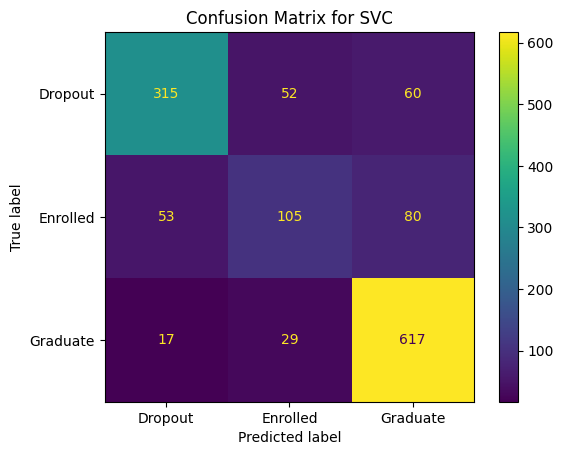

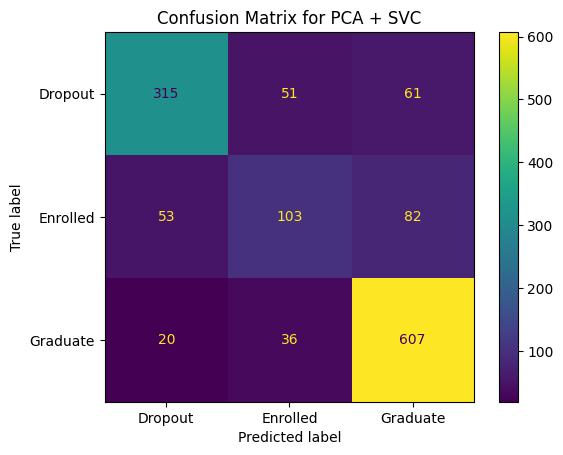

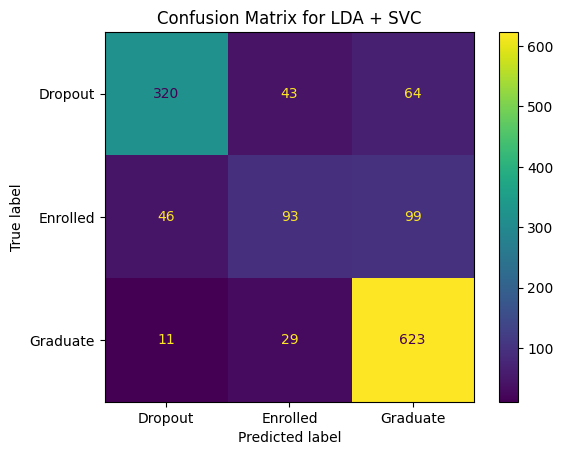

In [29]:
for name, result in zip(names, grid_results):
    ConfusionMatrixDisplay.from_estimator(result.best_estimator_, X_test, y_test)
    plt.title(f'Confusion Matrix for {name}')

The different Confusion matrices showed how the predictions are for the test data using the different models.

In [30]:
score_dict = {}
for name, result in zip(names, grid_results):
    score_dict[name] = [
        result.best_estimator_.score(
            X_test,
            y_test
        ),
        cohen_kappa_score(
            y_test, 
            result.best_estimator_.predict(X_test)
        )
    ]

score_df = pd.DataFrame(score_dict, index=['accuracy', 'kappa']).T.apply(round, ndigits=4)
score_df = score_df.style.apply(
    highlight_max
)
score_df

,accuracy,kappa
SVC,0.780900,0.633000
PCA + SVC,0.771800,0.618800
LDA + SVC,0.780100,0.627900


Shown are the accuracy for the test data which tells us that the models are able to predict if a student is Dropout, Enrolled, or Graduate three-fourths of the time. The kappa kappa scores for the range ~0.60 are substantial predictions.

From all the data summarized above, it can be interpreted that any of the three models are relatively within each other's ranges. 